# Decision tree

<a href="https://colab.research.google.com/github/chattopadhyayA/ml_pursue2025/blob/master/content/03_decision.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Concept

Decision trees are the simplest possible ML code that we can build. Rather than thinking too much about it, let us jump into the details. There are mainly two types of decision tree 

**Classification tree** : Classify people or things into two or more discrete categories. As we have done before

```{mermaid}
graph TD
    B["Do you know about decision trees?"]
    B -- Yes --> C["Have you implemented decision trees?"]
    C -- Yes --> D["Do not read"]
    C -- No --> E["Read"]
    B -- No --> F["Do you want to learn?"]
    F -- Yes --> G["Read"]
    F -- No --> H["Do not read."]
```

**Regression Trees** This one tries to predict a continuous value. The following example holds for that

```{mermaid}
graph TD
    B{"Is it fiction?<div>(100 books)"}
    B -- Yes --> C{"Is it a mystery novel?<div>(28 books)"}
    C -- Yes --> D["Mystery Fiction<div>(12 books)"]
    C -- No --> E["Other Fiction<div>(16 books)"]
    B -- No --> F{"Is it a biography?<div>(72 books)"}
    F -- Yes --> G["Biography Non-Fiction<div>(50 books)"]
    F -- No --> H["Other Non-Fiction<div>(22 books)"]
```

We see multiple parts in the *upside down tree* shown above. Here are its main components:

- **Root node or root**: The very top node in the tree
- **Internal or decision nodes**: They have arrows pointing to them and away from them.
- **Branches**: The arrows are called branches, they might be labelled "yes" or "no", or can be unlabelled. Usually if there is no label, then if the `Node` is `True` you go `Left` or else you go `Right`.
- **Leaf nodes or leaves**: They only have arrows pointing to them and represent the final classification.


You can see that classification trees are conceptually simple models. This means that they are highly **interpretable**, something that can be very desireable for a model as it allows us to peer into the inner workings of how the model works, instead of having to treat the model as a **black box**.


We will use **scikit-learn** and **Cost Complexity Pruning** to build this **Classification Tree** (below), which uses continuous and categorical data from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** to predict whether or not a patient has **[heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**:

```{figure} images/tree.png
---
height: 300px
name:   tree
align:  center
---
"Classification tree"
```

In this lesson we will be carefull and use the data very carefully

## Import the modules that will do all the work
The very first thing we do is load in a bunch of python modules. By this time you already know that Python, itself, just gives us a basic programming language. These modules give us extra functionality to import the data, clean it up and format it, and then build, evaluate and draw the classification tree. 


In [1]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import ConfusionMatrixDisplay # creates and draws a confusion matrix
# from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix


## Import the data
Now we load in a dataset from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)**.
Specifically, we are going to use the **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

When **pandas** (**pd**) reads in data, it returns a **dataframe**, which is a lot exactly like a spreadsheet, but similar with the structure of having a header, columns and data. The data are organized in rows and columns and each row can contain a mixture of text and numbers. The standard variable name for a **dataframe** is the initials **df**, and that is what we will use here:

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Load the dataset, specifying that '?' denotes missing values
df = pd.read_csv(url, header=None)

## print the first 5 rows
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that instead of nice column names, we just have column numbers. Normally you should check the dataset repository to see if they are including the headers in the data or not. If the headers are not icluded then, it should be written in the dataset repository. For example, in this case, the original dataset do not have the headers. That is why we read the dataset with `header=None` option included. Since nice column names would make it easier to know how to format the data, let's replace the column numbers with the following column names (grabbed from the repository website):

- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute


In [5]:
## change the column numbers to column names
df.columns = ['age', 
              'sex', 
              'cp', 
              'restbp', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal', 
              'hd']
## print the first 5 rows (including the column names)
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Missing Data: Identifying Missing Data

Unfortunately, the biggest part of any data analysis project is making sure that the data is correctly formatted and fixing it when it is not. **Missing Data** is simply a blank space, or a surrogate value like **NA**, or may be just a simple "?" mark, that indicates that we failed to collect data for one or more of the features. 

There are two main ways to deal with missing data:

1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but it wastes all of the other values that we collected. How a big of a waste this is depends on how important this missing value is for classification. For example, if we are missing a value for **age**, and **age** is not useful for classifying if people have heart disease or not, then it would be a shame to throw out all of the data just because we do not have their **age**.

2. We can **guess-timate** the values that are missing, depending on the dataset you are handling, your guess might needs to be changed. So, be careful with this approach.

In this section, we will focus on identifying missing values in the dataset. 

First, let's see what sort of data is in each column.

In [6]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal       float64
hd           int64
dtype: object

Although everything looks good. it is a good habbit to atleast check the unique variables for each entry of the column. In this case, I have already tested and found some anomaly which I will explain below. 

In [7]:
## print out unique values in the column called 'ca'
df['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

We see that **ca** contains numbers (0.0, 3.0, 2.0 and 1.0) and nan(not a number). The numbers represent the number of blood vessels that we lit up by fluoroscopy and the question marks represent missing data.

Now let's look at the unique values in **thal**.

In [8]:
## print out unique values in the column called 'thal'
df['thal'].unique()

array([ 6.,  3.,  7., nan])

Since scikit-learn's classification trees do not support datasets with missing values, we need to figure out what to do these question marks. We can either delete these patients from the training dataset, or impute values for the missing data. First let's see how many rows contain missing values.

In [13]:
missing_rows = df[pd.isna(df['ca']) | pd.isna(df['thal'])]

# Check how many such rows exist
print(len(missing_rows))

6


In [16]:
## print out the rows that contain missing values.
df.loc[pd.isna(df['ca']) | pd.isna(df['thal'])]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


Now let's count the number of rows in the full dataset.

In [17]:
len(df)

303

So 6 of the **303** rows, or **2%**, contain missing values. Since **303 - 6 = 297**, and **297** is plenty of data to build a classification tree, we will remove the rows with missing values, rather than try to impute their values. 

**NOTE:** Imputing missing values is a big topic that we will tackle in another webinar. By taking the "easy" route by just deleting rows with missing values, we can stay focused on **Decision Trees**.  

We remove the rows with missing values by selecting all of the rows that *do not* contain question marks in either the **ca** or **thal** columns:

In [18]:

## save a new dataframe called "df_no_missing"
df_no_missing = df.loc[df['ca'].notna() & df['thal'].notna()]

**Verify that now we do not have anything missing inside df_no_missing**

## Data formatting

Now we have no missing elements in the data, so we can format it like we need it. Here we will make "hd" as the target space $y$ and rest of the data as $X$. In some sense in this way $X$ can be thought of as our input or independent variables and $y$ as the dependent one.

In the code below we are using `copy()` to copy the data *by value*. By default, pandas uses copy *by reference*. Using `copy()` ensures that the original data `df_no_missing` is not modified when we modify `X` or `y`. In other words, if we make a mistake when we are formatting the columns for classification trees, we can just re-copy `df_no_missing`, rather than reload the original data and remove the missing values

In [20]:
## Make a new copy of the columns used to make predictions
X = df_no_missing.drop('hd', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [21]:
## Make a new copy of the column of data we want to predict
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

Now that we have split the dataframe into two pieces, $X$, which contains the data we will use to  predict classifications, and $y$, which contains the known classifications in our training dataset, we need to take a closer look at the variables in $X$. The list bellow tells us what each variable represents and the type of data (**float** or **categorical**) it should contain (again consult the data respository for understanding the data):

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina
  - 2 = atypical angina
  - 3 = non-anginal pain
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

Now, just to review, let's look at the data types in `X` to see how python is seeing the data:

In [22]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal       float64
dtype: object

So, we see that **age**, **restbp**, **chol** and **thalach** are all `float64`, which is good, because we want them to be floating point numbers. All of the other columns, however, need to be inspected to make sure they only contain reasonable values, and some of them need to change. This is because, while **scikit learn Decision Trees** natively support continuous data, like resting blood preasure (**restbp**) and maximum heart rate (**thalach**), they do not natively support categorical data, like chest pain (**cp**), which contains $4$ different categories. Thus, in order to use categorical data with **scikit learn Decision Trees**, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot Encoding**.

At this point you may be wondering, "what's wrong with treating categorical data like continuous data?" To answer that question, let's look at an example: For the **cp** (chest pain) column, we have $4$ options:
1. typical angina
2. atypical angina
3. non-anginal pain
4. asymptomatic

If we treated these values, $1$, $2$, $3$ and $4$, like continuous data, then we would assume that $4$, which means "asymptomatic", is more similar to $3$, which means "non-anginal pain", than it is to $1$ or $2$, which are other types of chest pain. That means the decision tree would be more likely to cluster the patients with $4$s and $3$s together than the patients with $4$s and $1$s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories.


Now let's inspect and, if needed, convert the columns that contain categorical and integer data into the correct datatypes. We'll start with **cp** (chest pain) by inspecting all of its unique values:

In [24]:
X['cp'].unique()

array([1., 4., 3., 2.])

**NOTE:** There are many different ways to do **One-Hot Encoding** in Python. Two of the more popular methods are `ColumnTransformer()` (from **scikit-learn**) and `get_dummies()` (from **pandas**), and the both methods have pros and cons. Please investigate using `ColumnTransformer()`, but here we will go with `get_dummies()`.

First, before we commit to converting **cp** with **One-Hot Encoding**, let's just see what happens when we convert **cp** without saving the results. This will make it easy to see how `get_dummies()` works.

In [25]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


As we can see in the printout above, `get_dummies()` puts all of the columns it does not process in the front and it puts **cp** at the end. It also splits **cp** into **4** columns, just like we expected it. **cp_1.0** is $1$ for any patient that scored a **1** for chest pain and $0$ for all other patients. **cp_2.0** is $1$ for any patient that scored **2** for chest pain and $0$ for all other patients. **cp_3.0** is $1$ for any patient that scored **3** for chest pain and **cp_4.0** is $1$ for any patient that scored **4** for chest pain.

Now that we see how `get_dummies()` works, let's use it on the four categorical columns that have more than 2 categories and save the result. **Check** if we missed any other categorical data. If yes then include that in the following.

In [26]:
X_encoded = pd.get_dummies(X, columns=['cp', 
                                       'restecg', 
                                       'slope', 
                                       'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


Now, one last thing before we build our very first **Classification Tree**.  $y$ doesn't just contain $0$s and $1$s. Instead, it has $5$ different levels of heart disease. $0 =$ no heart disease and $1-4$ are various degrees of heart disease. We can see this with `unique()`:

In [27]:
y.unique()

array([0, 2, 1, 3, 4])

For simplicity here we will be only making a tree that does simple classification and only care if someone has heart disease or not, so we need to convert all numbers $> 0$ to $1$.

In [28]:
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1  # set each non-zero value in y to 1
y.unique()               # verify that y only contains 0 and 1.

array([0, 1])

## Building A Classification Tree
Finally, the data are correctly formatted for making a **Classification Tree**. Now we simply split the data into **training** and **testing** sets and build the tree itself.

In [46]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier(
    max_depth=3,
    criterion="gini",
    random_state=42,
)

clf_dt = clf_dt.fit(X_train, y_train)

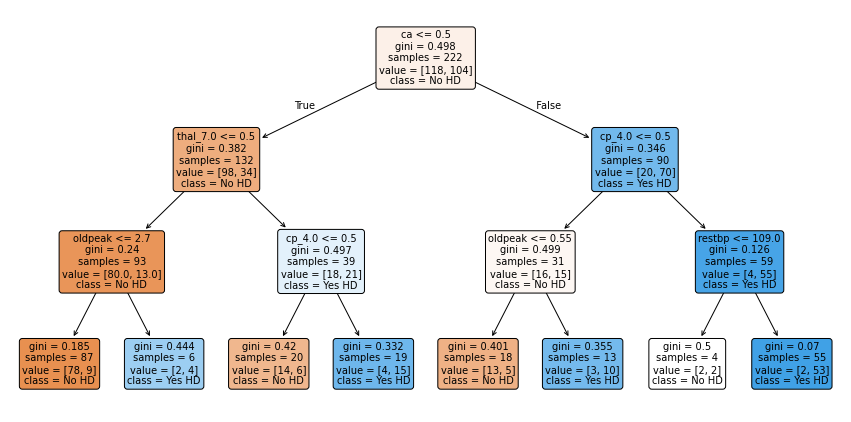

In [47]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X_encoded.columns); 

Fuyooh!!, we've built a **Classification Tree** for classification. Let us now observe how it performs on the **Testing Dataset** by running the **Testing Dataset** down the tree and drawing a **Confusion Matrix**.

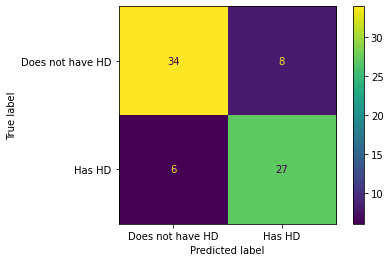

In [48]:
## plot_confusion_matrix() will run the test data down the tree and draw
## a confusion matrix.
ConfusionMatrixDisplay.from_estimator(clf_dt, 
                                      X_test, 
                                      y_test, 
                                      display_labels=["Does not have HD", "Has HD"])

In the confusion matrix, we see that of the **34 + 8 = 42** people that did not have **Heart Disease**, **34 (80%)** were correctly classified. And of the **6 + 27 = 33** people that have **Heart Disease**, **27(81)** were correctly classified. Can we do better?  To make sure of that we should analyze the data

We want to see how our model performs. To do this, we can use several common metrics for quantifying the performance of classification models. These metrics help us understand how well our model is making predictions, and each one gives us a different perspective on its strengths and weaknesses.

- Accuracy: Measures the proportion of correct predictions out of all predictions made.
    ```{math}
    \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
    ```
  - Good for: Balanced datasets where all classes are equally important.  
  - Limitations: Can be misleading if the dataset is imbalanced (i.e., some classes are much more frequent than others).

- Precision: Measures the ratio of correctly predicted positive observations to the total predicted positives.
    ```{math}
    \text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}
    ```
    where TP = True Positives, FP = False Positives.  
  - Good for: Situations where the cost of a false positive is high (e.g., spam detection, where marking a real email as spam is bad).

- Recall (Sensitivity or True Positive Rate): Measures the ratio of correctly predicted positive observations to all actual positives.
    ```{math}
    \text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}
    ```
    where FN = False Negatives.  
  - Good for: Situations where missing a positive case is costly (e.g., disease screening, where missing a sick patient is worse than a false alarm).

- F1 Score: It is the harmonic mean of precision and recall. It balances the two metrics and is useful when you need a single score that accounts for both false positives and false negatives.
    ```{math}
    \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
    ```
  - Good for: Datasets with class imbalance, or when you want to balance precision and recall.

`scikit-learn` is generous enough to bless us with functions that compute all of these metrics for us, so we don't have to do much work to compute these functions.

In [49]:
# Function for computing accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(y_true, y_pred):
    """Helper function to compute accuracy, precision, recall, and F1 score at once."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Pretty print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

Testing the performance of the model on training data...

In [50]:
# Testing model on training sets
y_train_pred = clf_dt.predict(X_train)

# Compute metrics for training sets
print("Training Set Metrics:")
compute_metrics(y_train, y_train_pred)


Training Set Metrics:
Accuracy: 0.8514
Precision: 0.8817
Recall: 0.7885
F1 Score: 0.8325


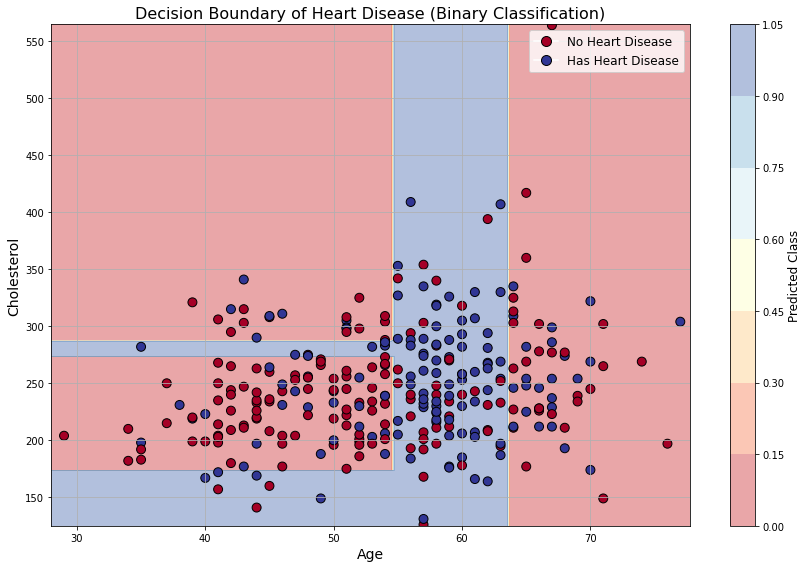

In [56]:
# Select 2 features and binarized target to see decision boundary
feature_names = ['age', 'chol']
X_vis = df_no_missing[feature_names].values

y = df_no_missing['hd'].copy()
y[y > 0] = 1
y = y.values

# Fit a decision tree for two features
clf_vis = DecisionTreeClassifier(max_depth=3,
    criterion="gini",
    random_state=42,)
clf_vis.fit(X_vis, y)

# Prepare the meshgrid for decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.25),
                     np.arange(y_min, y_max, 0.25))
Z = clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot decision boundary
contour = ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot original data points
scatter = ax.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=80)

# Axis labeling
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Cholesterol', fontsize=14)
ax.set_title("Decision Boundary of Heart Disease (Binary Classification)", fontsize=16)
ax.grid(True)

# Colorbar and legend
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label("Predicted Class", fontsize=12)
legend_labels = ['No Heart Disease', 'Has Heart Disease']
legend_handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=plt.cm.RdYlBu(0.), label=legend_labels[0], markersize=10, markeredgecolor='k'),
                  plt.Line2D([], [], marker='o', color='w', markerfacecolor=plt.cm.RdYlBu(1.), label=legend_labels[1], markersize=10, markeredgecolor='k')]
ax.legend(handles=legend_handles, fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()



## How does a tree "learn"?

Now we can ask the question, how is the tree getting trained? While at first it might seem somewhat mysterious when you think about it, how the model actually trains is relatively straight forward, and it comes down to a common theme in ML: the minimization/maximization of some metric guiding an iterative training process. 


Remember the notion of gini index that we learned just before. When you start, at the begining you only have the root node, in which all of your data will fall since no split has been made. So Gini index is zero there. In order to determine a split, the training algorithm creates all possible splits using all features and all values of those features as thresholds. This process is repeated for all possible splits, and then the "best" split is chosen by choosing the one has the lowest total Gini impurity. 


### ❓ Exercise
**Q7:** Change the depth of the tree and train again. Does more depth means more accuracy??

<details>
<summary>Click to show answer</summary>

Answer: Not necessarily. Check it again.
```

</details>

## Tips

When you are not taking a tutorial session, and doing serious data analysis for life and death. One good trick is to first visualise the data without even running any ML, look for the features which are already seperated a bit. and only include them in your tree dataset. For example in the below, I have visualised some of the data from the heart disease dataset. Can you try to play around and figure out which of the data are more relevant??? Is there something, that you can automate??

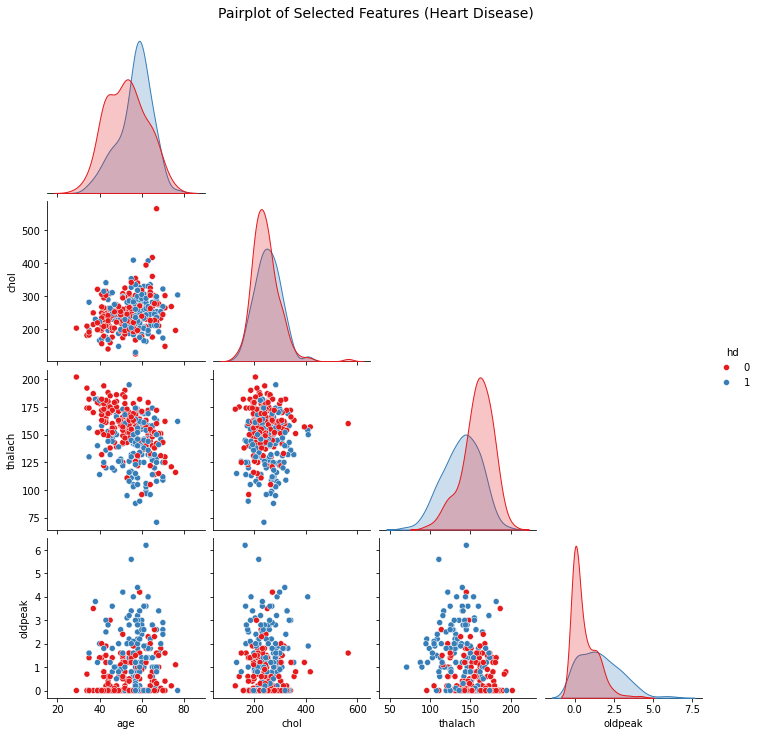

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few relevant features and the target
selected_features = ['age', 'chol', 'thalach', 'oldpeak', 'hd']
df_subset = df_no_missing[selected_features].copy()

# Convert target to binary: 0 = No HD, 1 = Has HD
df_subset['hd'] = df_subset['hd'].apply(lambda x: 1 if x > 0 else 0)

# Plot pairplot with hue based on heart disease
sns.pairplot(df_subset, hue='hd', diag_kind='kde', corner=True, palette='Set1')
plt.suptitle("Pairplot of Selected Features (Heart Disease)", y=1.02, fontsize=14)
plt.show()